# Testes de Hipóteses

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
#from vega_datasets import data
import seaborn as sns
sns.set()

In [2]:
# Tamanho default das figuras
matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)

In [3]:
# Load gun violence dataset and gun laws dataset
gun_violence = pd.read_csv('../databases/gun_violence_clean.zip', compression='zip')
gun_law = pd.read_csv('../databases/gun_laws.zip', compression='zip')
population = pd.read_csv('../databases/population.zip', compression='zip')

## Teste 1
Hipotese nula: Leis não afetam o número de incidentes ou mortos e/ou feridos.

Hipotese alternativa: Leis afetam o número de incidentes ou mortos e/ou feridos.

In [4]:
gun_violence = gun_violence[['incident_id', 'state', 'n_killed', 'n_injured', 'year', 'month', 'day']]
gun_violence = gun_violence[~gun_violence['year'].isin(['2013', '2018'])]
glaw = gun_law.iloc[:, 1:]
population = population[['2014', '2015', '2016', '2017']]

pop = population.reset_index().drop('index', axis=1)

incidents_state = gun_violence.groupby('state')\
                  .agg({'n_injured':'sum', 'incident_id':'count', 'n_killed':'sum'})\
                  .rename(columns={'incident_id':'number_of_incidents'})\
                  .sort_values('state')\
                  .reset_index()
# Join the dataframes
states = pd.concat([incidents_state, pop, glaw], axis=1, sort=False, join='inner')
# Population mean 
states['mean_pop'] = ((states['2014'] + states['2015'] + states['2016'] +states['2017'])/4)
# Porcents per 100k people
states['porcent_killed'] = (states['n_killed']/ states['mean_pop']) * 100000
states['porcent_incidents'] = (states['number_of_incidents']/ states['mean_pop']) * 100000
states['porcent_injured'] = (states['n_injured']/ states['mean_pop']) * 100000
# Column counting the number of laws a state has adopted
states['total_leis'] = (states.iloc[:, 8:15].sum(axis=1))

In [5]:
states

,state,n_injured,number_of_incidents,n_killed,2014,2015,2016,2017,Red Flag Laws,Relinquishment Laws,Assault Weapon Ban,High-Capacity Magazine ban,Prohibition for high-risk individuals,Prohibitions for individual with domestic violence covictions,Mandatory universal background checks,mean_pop,porcent_killed,porcent_incidents,porcent_injured,total_leis
0,Alabama,614,1411,804,4842481,4853160,4864745,4875120,0,0,0,0,1,1,0,4858876.50,16.547035,29.039635,12.636666,2
1,Alaska,105,557,153,736307,737547,741504,739786,0,0,0,0,1,0,0,738786.00,20.709651,75.393957,14.212505,1
2,Arizona,323,776,550,6733840,6833596,6945452,7048876,0,0,0,0,1,1,0,6890441.00,7.982073,11.261979,4.687654,2
3,Arkansas,511,993,378,2967726,2978407,2990410,3002997,0,0,0,0,1,0,0,2984885.00,12.663804,33.267613,17.119588,1
4,California,1861,5180,2265,38625139,38953142,39209127,39399349,1,1,1,1,1,1,1,39046689.25,5.800748,13.266170,4.766089,7
5,Colorado,269,849,366,5351218,5452107,5540921,5615902,0,0,0,1,1,1,1,5490037.00,6.666622,15.464377,4.899785,4
6,Connecticut,356,1135,159,3594783,3587509,3578674,3573880,1,1,1,1,1,1,1,3583711.50,4.436741,31.671076,9.933835,7
7,Delaware,342,645,86,932596,941413,949216,957078,0,0,0,0,1,1,1,945075.75,9.099800,68.248498,36.187575,3
8,District of Columbia,140,307,168,662513,675254,686575,695691,0,0,1,1,1,1,1,680008.25,24.705583,45.146511,20.587986,5
9,Florida,2153,4659,1706,19860330,20224249,20629982,20976812,0,0,0,0,1,1,0,20422843.25,8.353391,22.812690,10.542117,2


In [6]:
def plot_column(s, states):
    #Plot cordering by total_leis
    states = states.sort_values([s])
    sns.lineplot(x='state', y='porcent_incidents', marker='o',
                         data=states, label='porcentagem incidentes por 100k pessoas', sort=False)
    sns.lineplot(x='state', y='porcent_killed', marker='o',
                         data=states, label='porcentagem mortos por 100k pessoas', sort=False)
    sns.lineplot(x='state', y='porcent_injured', marker='o',
                         data=states, label='porcentagem feridos por 100k pessoas', sort=False)
    sns.barplot(x='state', y=s,
                         data=states, label='Possui a lei')
    # Título do plot
    plt.title("Porcentagens comparadas com total de leis")
    # Nome do eixo x
    plt.xlabel('Estado')
    # Nome do eixo y
    plt.ylabel('Número de pessoas')
    # Rotaciona nomes no eixo x
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

### Total de leis

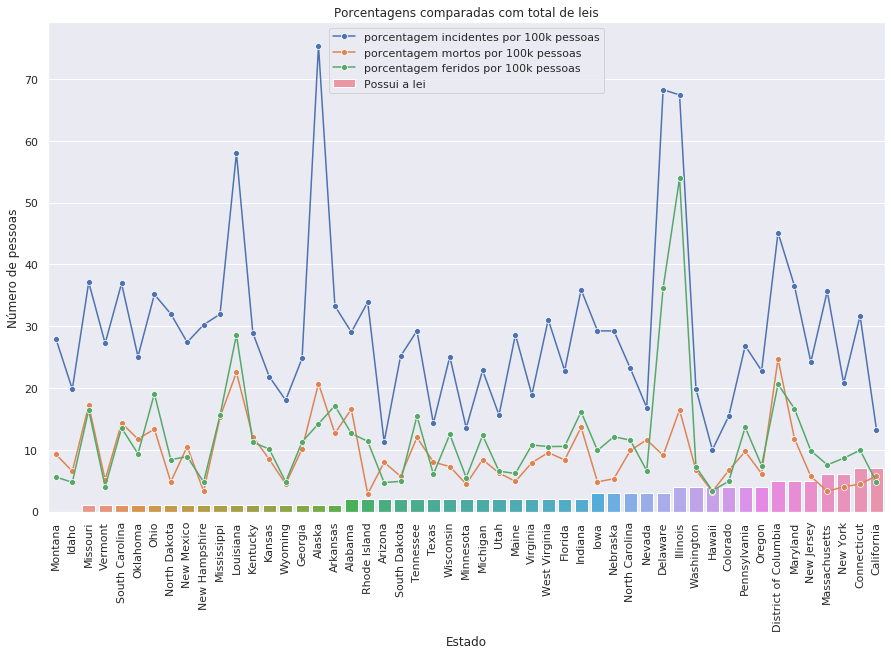

In [7]:
plot_column('total_leis', states)

#### O total de leis em si não apresenta uma relação, iremos olhar dentre as 7 leis se alguma individual afeta mais.O

### Red Flag Laws

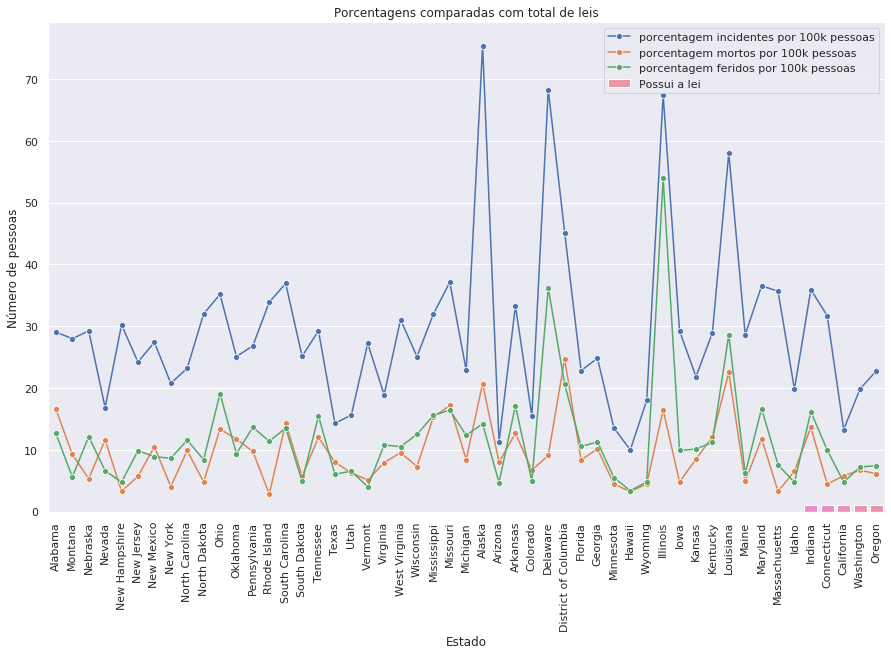

In [8]:
plot_column('Red Flag Laws', states)

#### Para a lei de Red Flag, n existe uma relação clara.

### Relinquishment Laws	

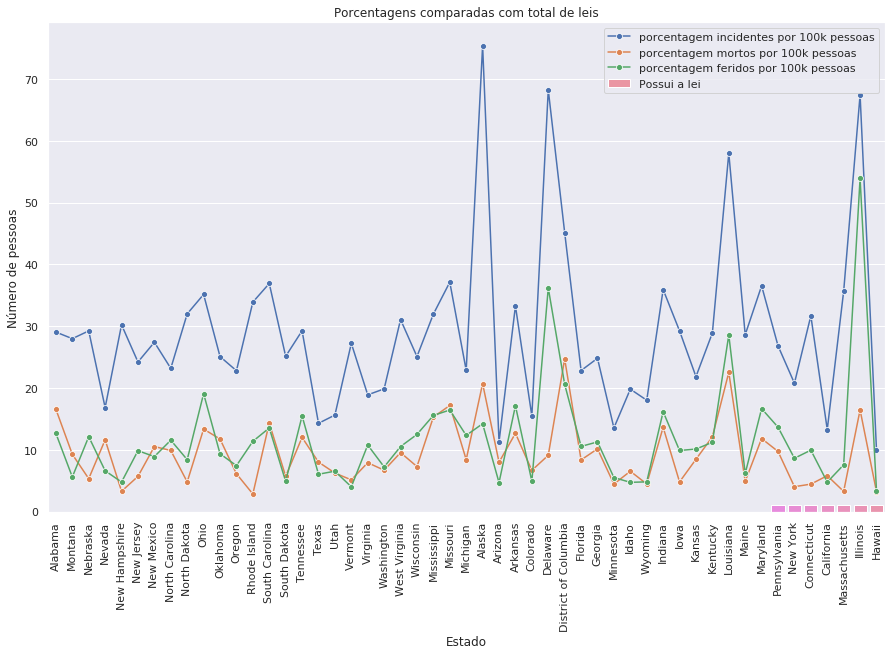

In [9]:
plot_column('Relinquishment Laws', states)

#### Para a lei de  Relinquishment Laws	, n existe uma relação clara.

### Assault Weapon Ban

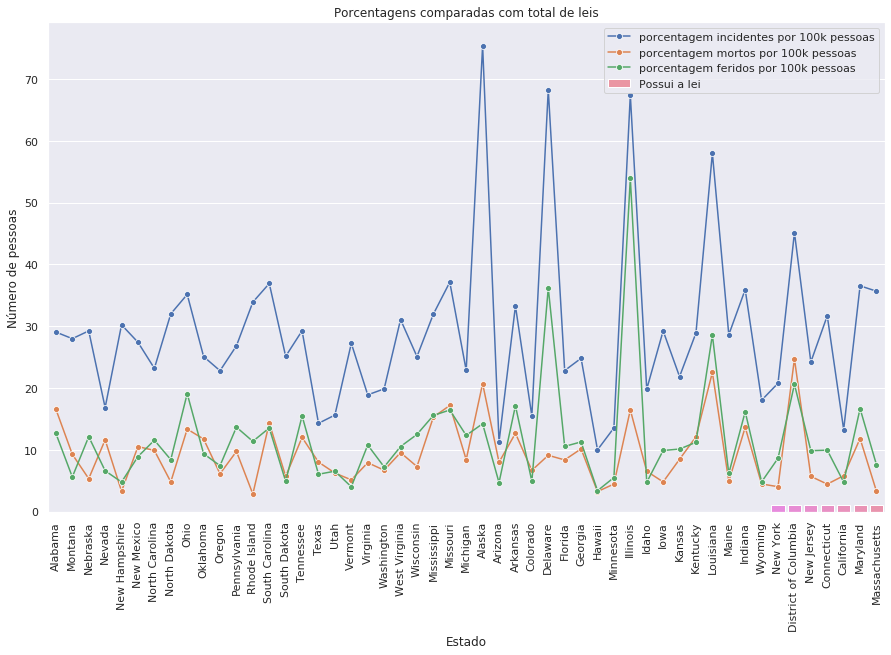

In [10]:
plot_column('Assault Weapon Ban', states)

#### Para a lei de Assault Weapon Ban	, n existe uma relação clara.

### High-Capacity Magazine ban

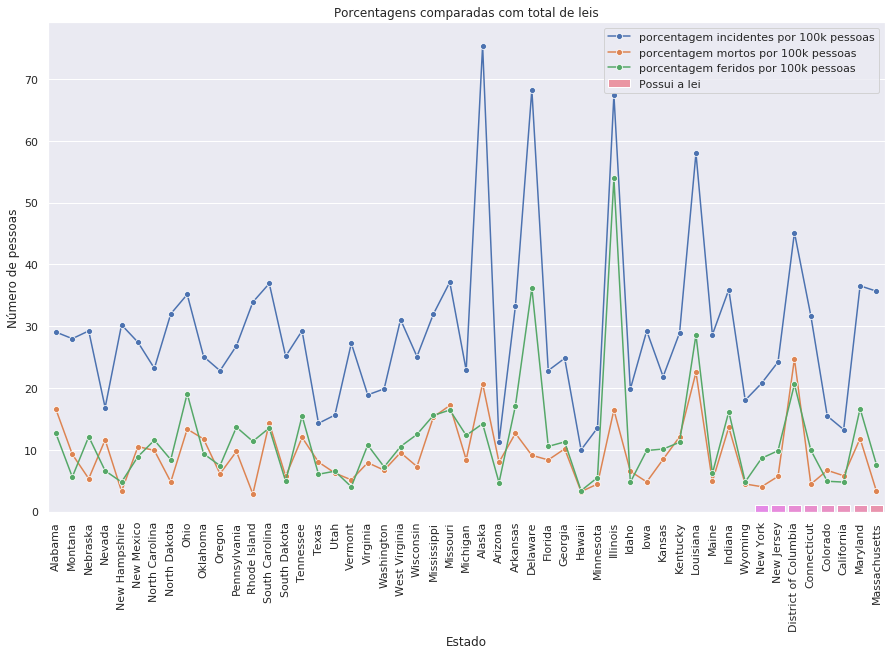

In [11]:
plot_column('High-Capacity Magazine ban', states)

#### Para a lei de   High-Capacity Magazine ban	, n existe uma relação clara.

### Prohibition for high-risk individuals

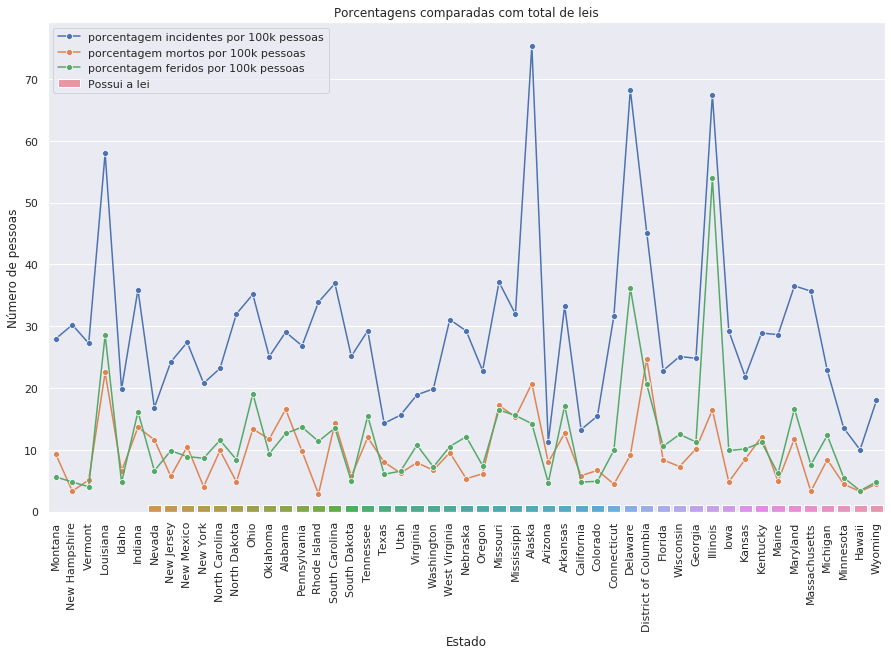

In [12]:
plot_column('Prohibition for high-risk individuals', states)

#### Para a lei de   Prohibition for high-risk individuals	, n existe uma relação clara.

### Prohibitions for individual with domestic violence covictions	

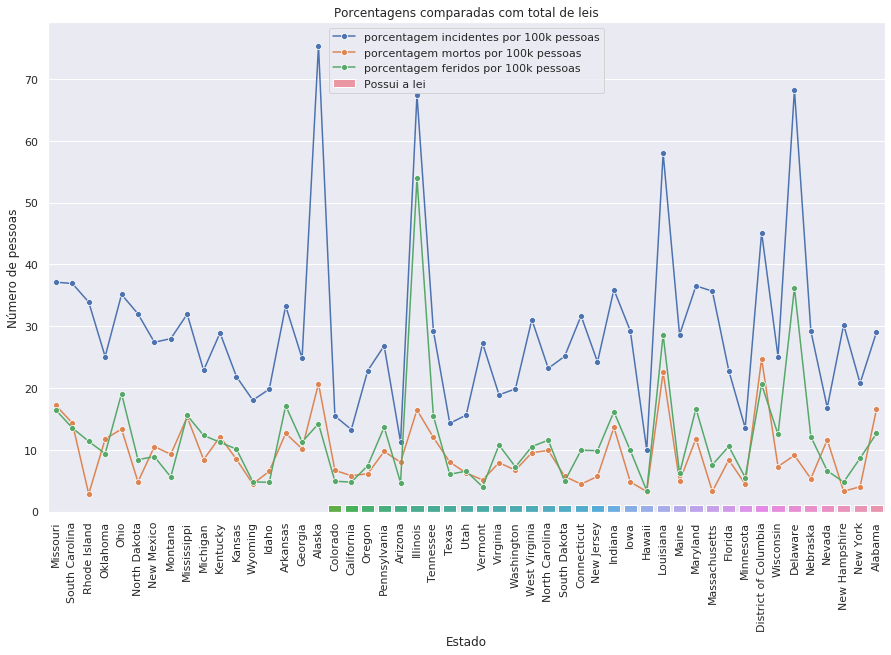

In [13]:
plot_column('Prohibitions for individual with domestic violence covictions', states)

#### Para a lei de Prohibitions for individual with domestic violence covictions, n existe uma relação clara.

### Mandatory universal background checks		

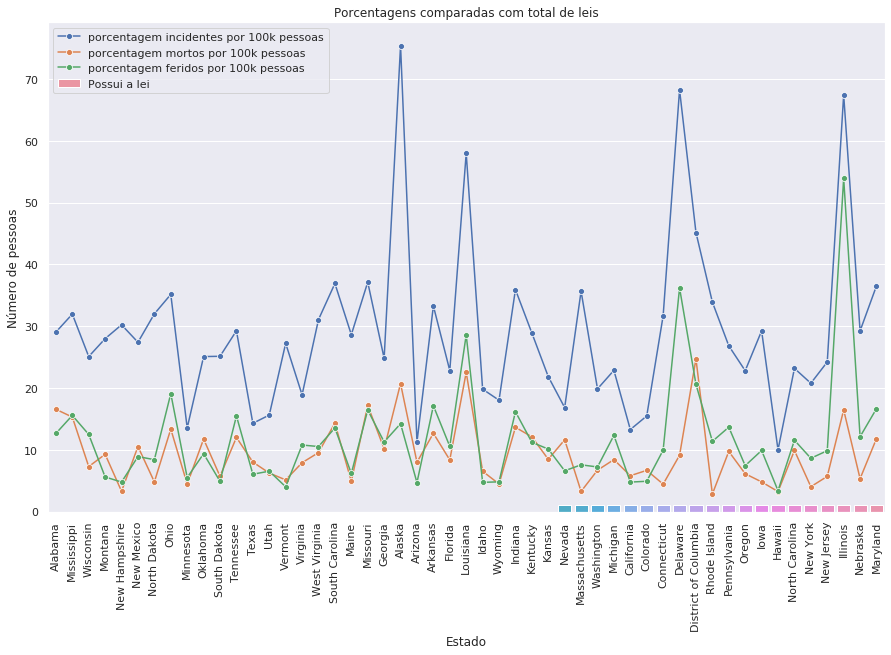

In [14]:
plot_column('Mandatory universal background checks', states)

#### Para a lei de Mandatory universal background checks, n existe uma relação clara.

Dentre todas as leis observadas, nenhuma e nem o total delas parece influenciar o número de incidentes.

## IC 1

Utilizando a lei de Prohibitions for individual with domestic violence covictions, vamos achar o intervalo de confiança do grupo de estados que possui essa lei, dada a escolha aleatória de um estado.

In [20]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [21]:
lei = 'Prohibitions for individual with domestic violence covictions'

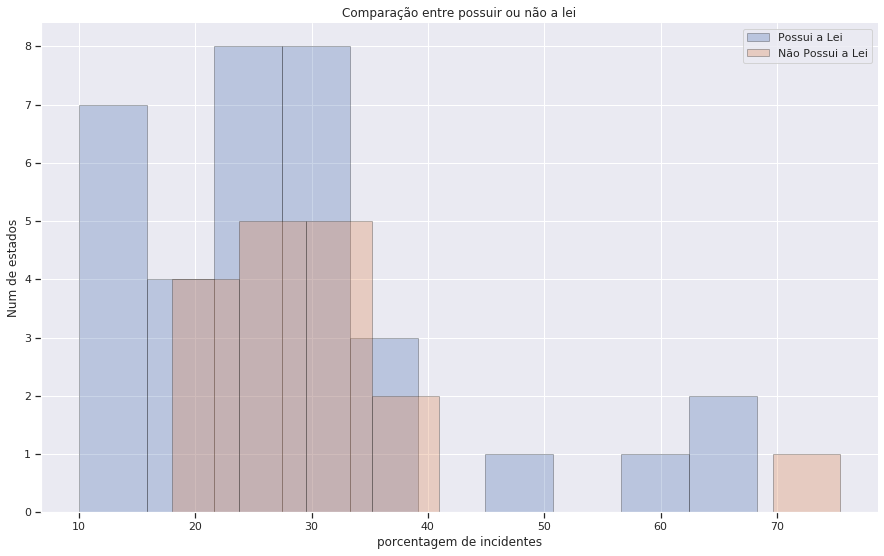

In [30]:
# Quem possui a lei x Quem não possui, comparando num incidentes
df1 = states[states[lei] == 1]
df2 = states[states[lei] == 0]

plt.hist(df1['porcent_incidents'], alpha=0.3, edgecolor='k', label='Possui a Lei')
plt.hist(df2['porcent_incidents'], alpha=0.3, edgecolor='k', label='Não Possui a Lei')
despine()
plt.title('Comparação entre possuir ou não a lei')
plt.xlabel('porcentagem de incidentes')
plt.ylabel('Num de estados')
plt.legend()
plt.show()

In [16]:
def ic(df, column):
    data = df[column]
    mean = data.mean()
    std = data.std(ddof=1)
    se = std / np.sqrt(len(data))
    
    return (mean - 1.96 * se, mean + 1.96 * se)

In [35]:
ic(df1, 'porcent_incidents')

(23.26413702418077, 32.744703739225606)

In [37]:
ic(df2, 'porcent_incidents')

(25.229883688318736, 37.39204687946164)

In [43]:
len(df2)

17

In [44]:
# Boostrap da diferenca das medias com amostras
def bootstrap_diff(df1=df1, df2=df2, column='porcent_incidents', n=5000):
    '''
    df1: dataframe com a lei
    df2: dataframe sem a lei
    column: a coluna que queremos focar
    n: número de amostras para o bootstrap
    '''
    values = np.zeros(n)
    for i in range(n):
        sample1 = df1[column].sample(len(df1), replace=True)
        sample2 = df2[column].sample(len(df2), replace=True)
        values[i] = sample1.mean() - sample2.mean()
    return values

In [45]:
diff = bootstrap_diff()

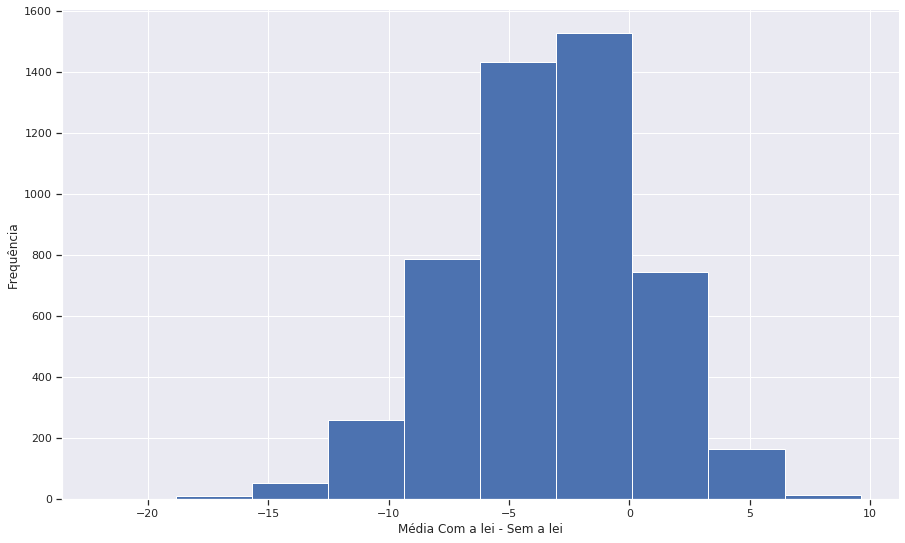

In [49]:
plt.hist(diff)
plt.xlabel('Média Com a lei - Sem a lei')
plt.ylabel('Frequência')
despine()

In [50]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(diff)
plt.plot(ecdf.x, ecdf.y)
plt.xlabel('Média Com a lei - Sem a lei')
plt.ylabel('P(X <= x)')
despine()

ImportError: cannot import name 'factorial'